# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# load dataset
df = pd.read_csv("C:/Users/Sourabh/Downloads/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


# Exploratory Data Analysis(EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
df.describe(include='object')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [8]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [9]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [10]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [11]:
by_cpt =df.groupby("ChestPainType")
by_cpt.mean()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
ChestPainType,,,,,,,
ASY,54.959677,133.229839,186.645161,0.284274,128.477823,1.162702,0.790323
ATA,49.242775,130.624277,233.046243,0.109827,150.208092,0.307514,0.138728
NAP,53.310345,130.960591,197.438424,0.201970,143.236453,0.674877,0.354680
TA,54.826087,136.413043,207.065217,0.282609,147.891304,1.036957,0.434783


In [12]:
by_recg = df.groupby('RestingECG')
by_recg.mean()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
RestingECG,,,,,,,
LVH,56.218085,134.335106,236.946809,0.223404,143.117021,1.069681,0.563830
Normal,51.740942,130.635870,195.375000,0.201087,137.302536,0.786051,0.516304
ST,56.140449,135.808989,169.129213,0.342697,128.617978,1.008989,0.657303


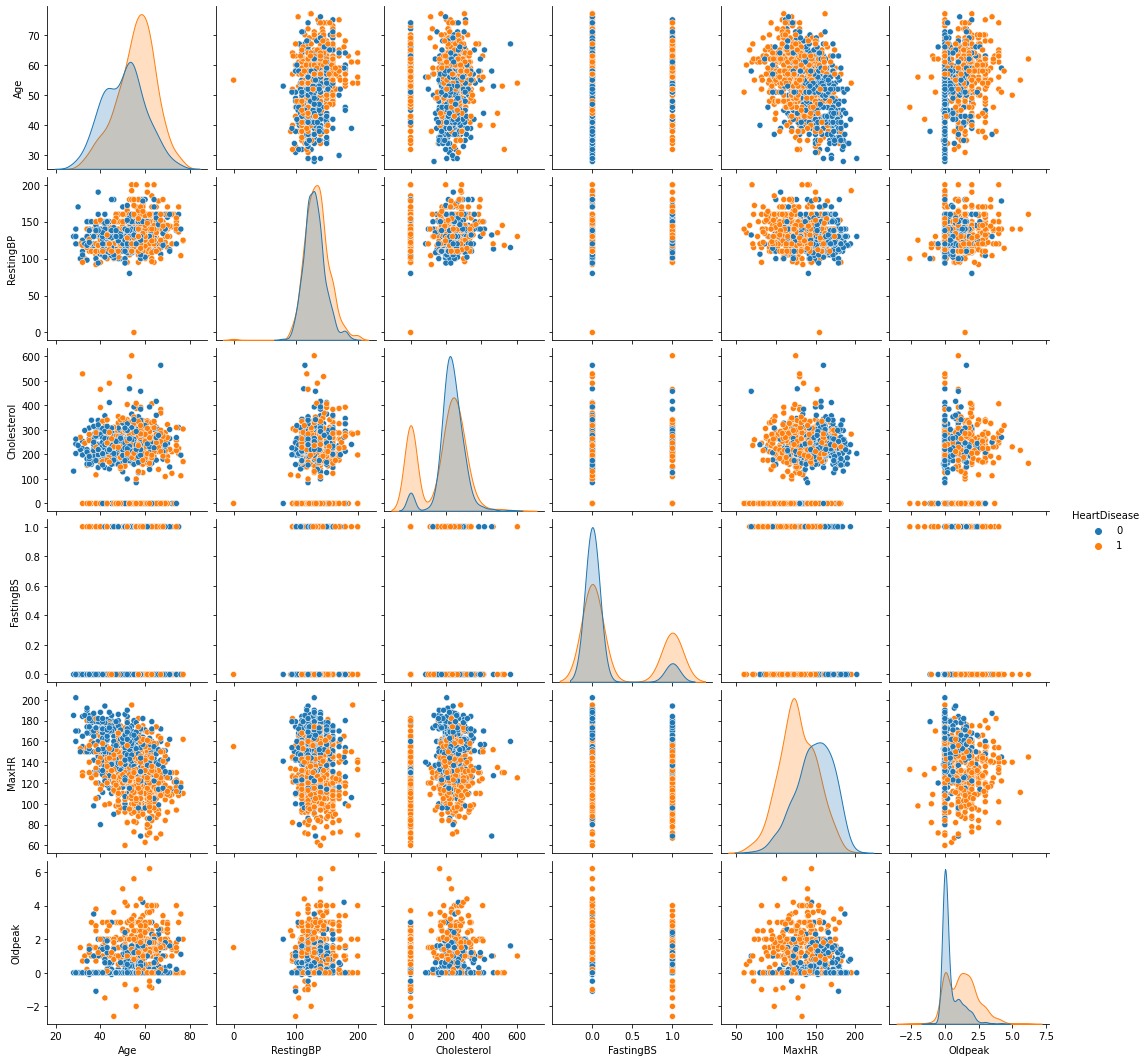

In [13]:
sns.pairplot(df,hue='HeartDisease')

# Univariate Analysis

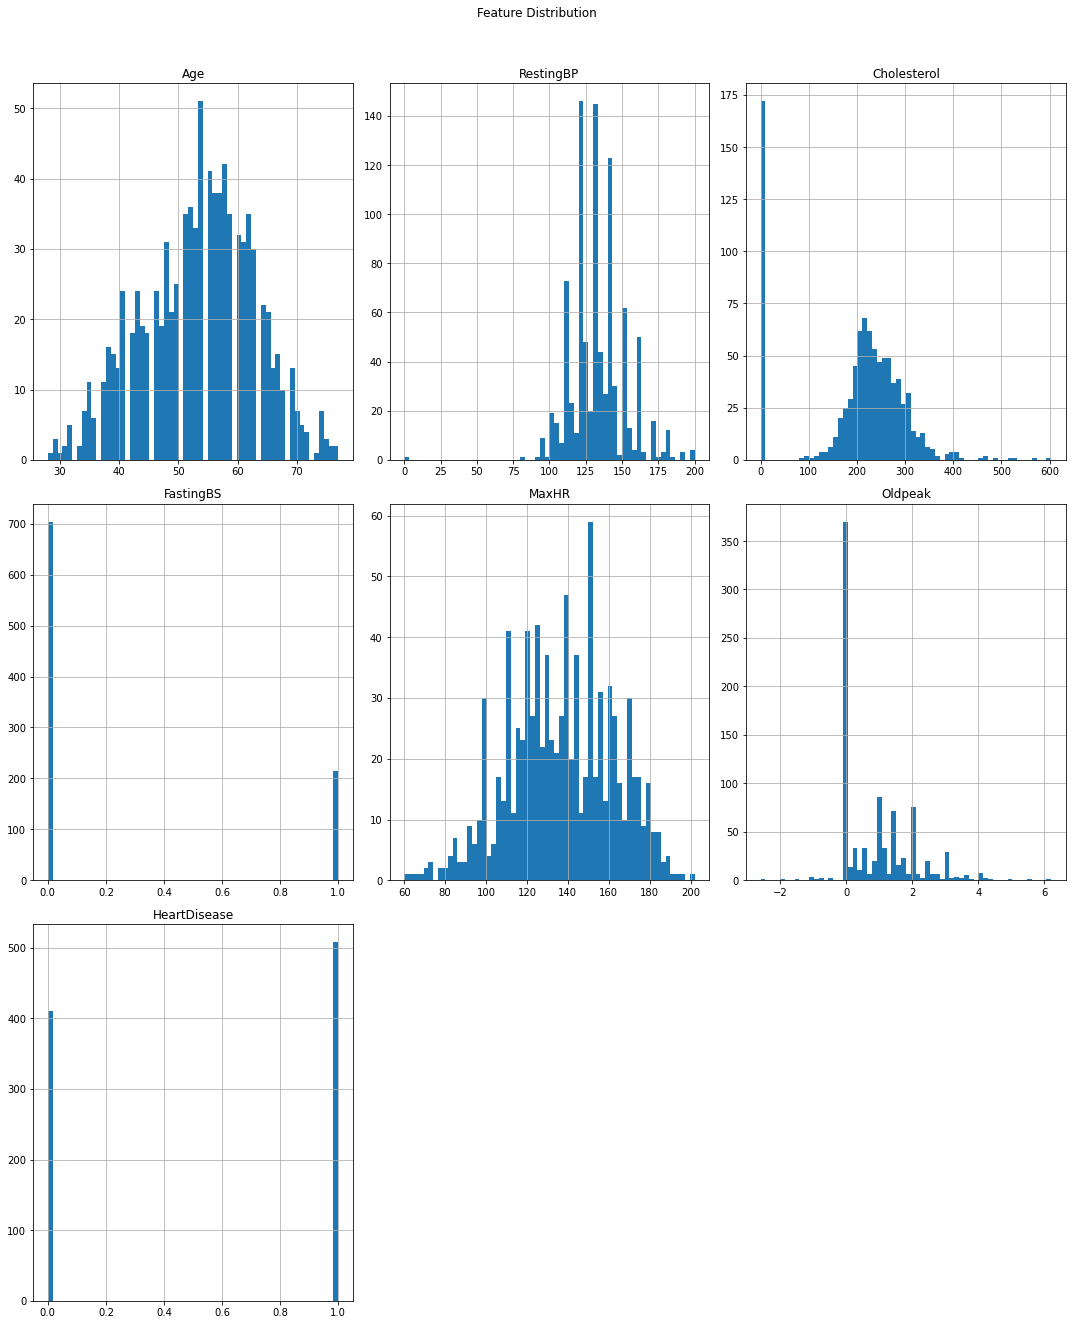

In [14]:
df.hist(figsize=(15,18),bins=60)
plt.suptitle("Feature Distribution",x=0.5,y=1.02,ha='center',fontsize='large')
plt.tight_layout()

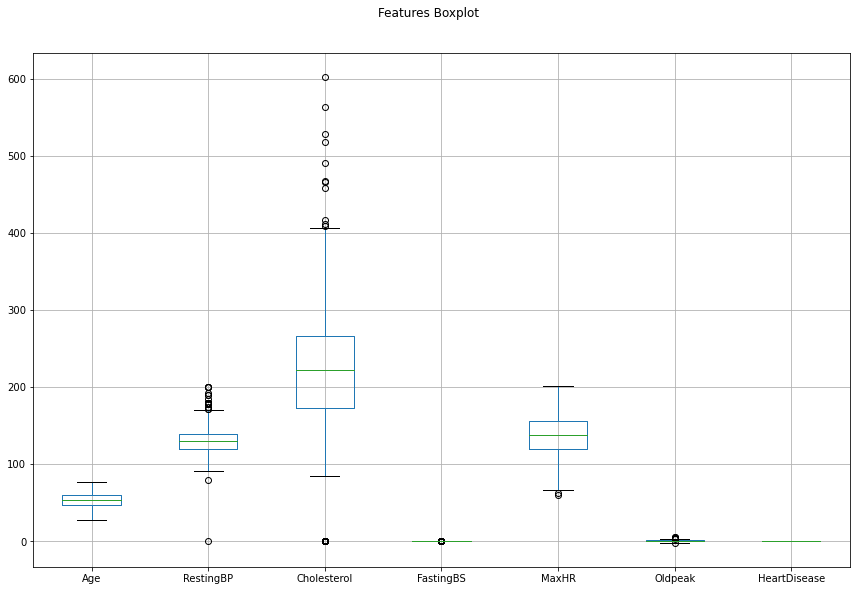

In [15]:
df.boxplot(figsize=(12,8))
plt.suptitle("Features Boxplot",x=0.5,y=1.02,ha='center',fontsize='large')
plt.tight_layout()

([<matplotlib.patches.Wedge at 0x1fb7864e670>,
 [Text(-0.8686626780128878, 0.6748519480800795, 'Male'),
  Text(0.8686626780128874, -0.67485194808008, 'Female')],
 [Text(-0.47381600618884784, 0.3681010625891342, '79%'),
  Text(0.4738160061888476, -0.3681010625891345, '21%')])

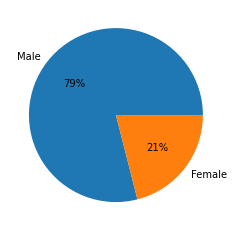

In [16]:
gender = ['Male','Female']
gender_data = pd.Series(df['Sex']).value_counts()
plt.figure(figsize=(4,4))
plt.pie(gender_data,labels=gender,autopct='%.0f%%')

([<matplotlib.patches.Wedge at 0x1fb78694760>,
 [Text(-0.13891224983042616, 1.0911935606697143, 'ASY: Asymptomatic'),
  Text(-0.641681260491555, -0.8934456670296014, 'NAP: Non-Anginal Pain'),
  Text(0.677820807686612, -0.8663480551528173, 'ATA: Atypical Angina'),
  Text(1.0863982306333049, -0.1724496578043122, 'TA: Typical Angina')],
 [Text(-0.07577031808932334, 0.5951964876380259, '54%'),
  Text(-0.35000796026812087, -0.48733400019796436, '22%'),
  Text(0.3697204405563338, -0.4725534846288094, '19%'),
  Text(0.5925808530727117, -0.09406344971144302, '5%')])

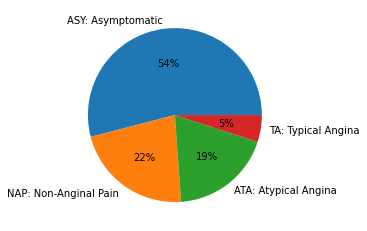

In [17]:
chest_pain = ['ASY: Asymptomatic', 'NAP: Non-Anginal Pain', 'ATA: Atypical Angina', 'TA: Typical Angina']
cp_data = pd.Series(df['ChestPainType']).value_counts()
plt.figure(figsize=(4,4))
plt.pie(cp_data,labels=chest_pain,autopct='%.0f%%')

([<matplotlib.patches.Wedge at 0x1fb786df850>,
 [Text(-0.34421212269343693, 1.0447573950879114, 'Normal'),
  Text(-0.31548342260471296, -1.0537885034776269, 'LVH'),
  Text(0.9021455870071273, -0.6293912454456019, 'ST')],
 [Text(-0.18775206692369284, 0.5698676700479517, '60%'),
  Text(-0.17208186687529795, -0.5747937291696146, '20%'),
  Text(0.4920794110947967, -0.34330431569760095, '19%')])

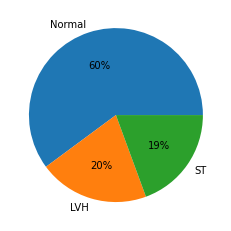

In [18]:
rest_ecg = ['Normal', 'LVH','ST']
recg_data = pd.Series(df['RestingECG']).value_counts()
plt.figure(figsize=(4,4))
plt.pie(recg_data,labels=rest_ecg,autopct='%.0f%%')

<AxesSubplot:xlabel='Sex', ylabel='count'>

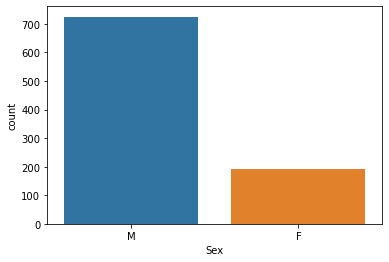

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x = 'Sex')

<AxesSubplot:xlabel='ChestPainType', ylabel='count'>

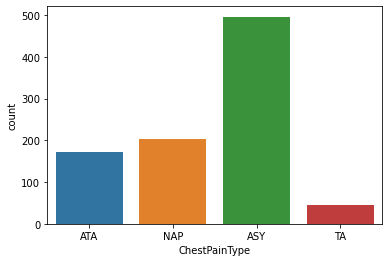

In [20]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='ChestPainType')

<AxesSubplot:xlabel='RestingECG', ylabel='count'>

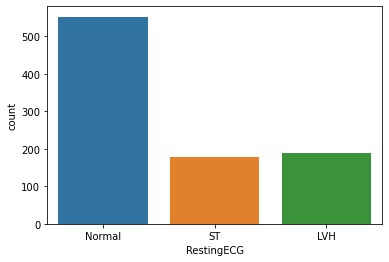

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='RestingECG')

<AxesSubplot:xlabel='ExerciseAngina', ylabel='count'>

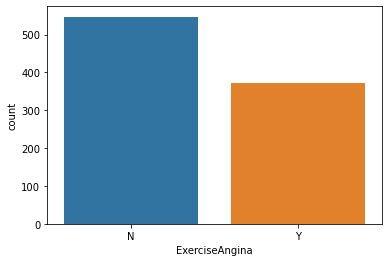

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x = 'ExerciseAngina')

<AxesSubplot:xlabel='ST_Slope', ylabel='count'>

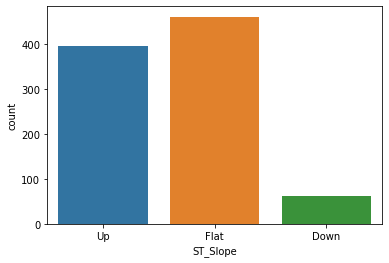

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x = 'ST_Slope')

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

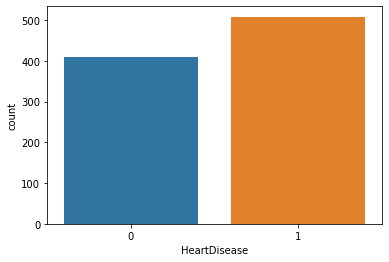

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x = 'HeartDisease')

In [25]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

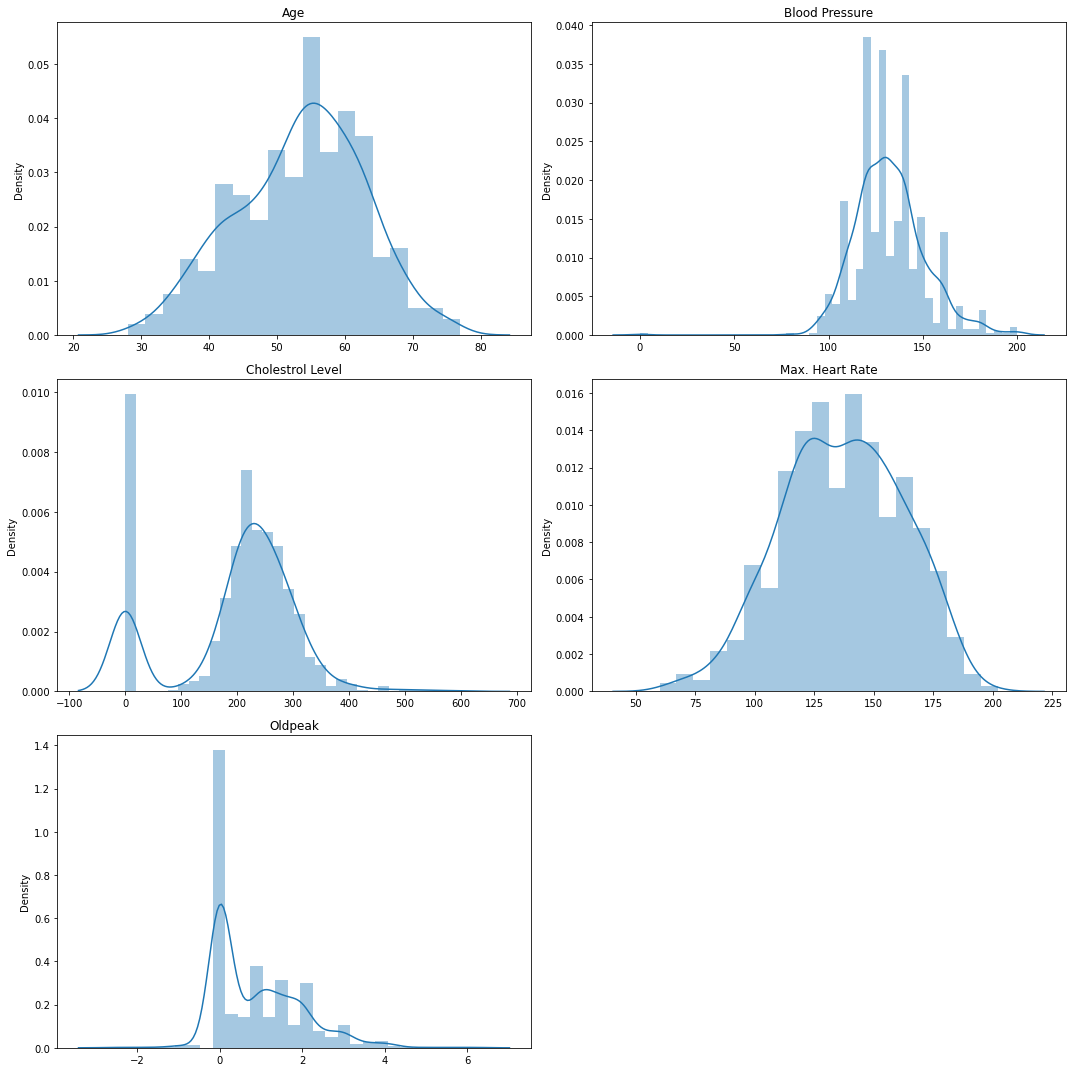

In [26]:
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
sns.distplot(x=df['Age'], kde=True)
plt.title('Age')

plt.subplot(3,2,2)
sns.distplot(x=df['RestingBP'], kde=True)
plt.title('Blood Pressure')

plt.subplot(3,2,3)
sns.distplot(x=df['Cholesterol'], kde=True)
plt.title('Cholestrol Level')

plt.subplot(3,2,4)
sns.distplot(x=df['MaxHR'], kde=True)
plt.title('Max. Heart Rate')

plt.subplot(3,2,5)
sns.distplot(x=df['Oldpeak'], kde=True)
plt.title('Oldpeak')

plt.tight_layout()



# Bivariate Analysis

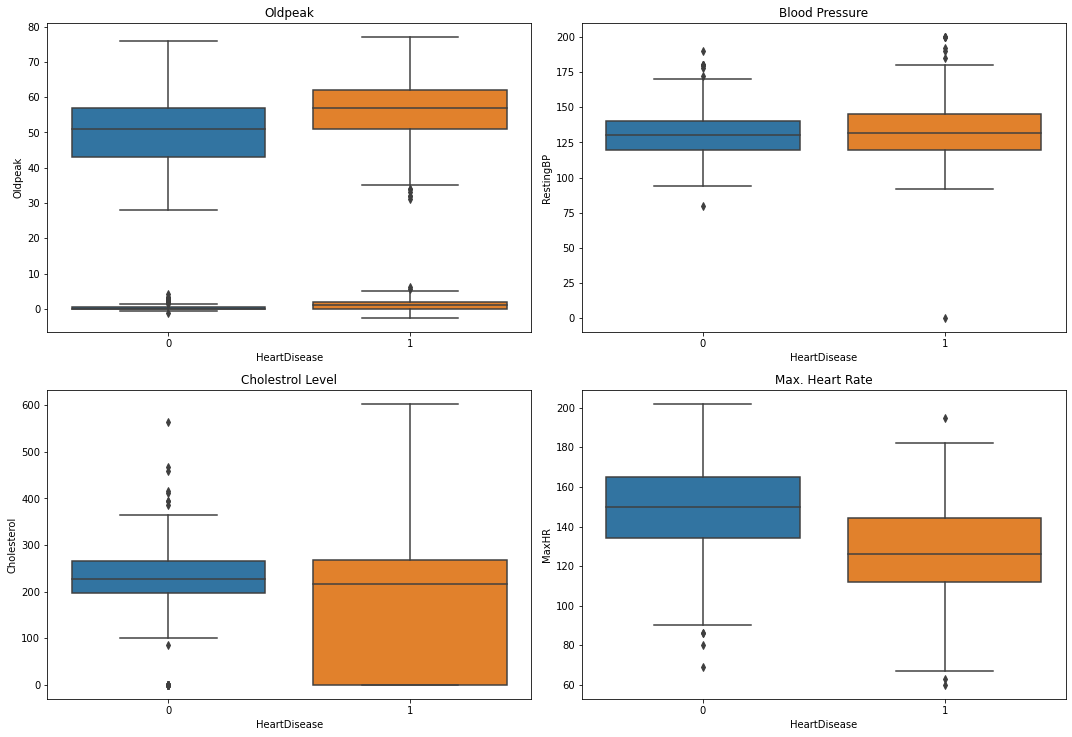

In [27]:
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.boxplot(x=df['HeartDisease'], y=df['Age'])
plt.title('Age')

plt.subplot(3,2,2)
sns.boxplot(x=df['HeartDisease'], y=df['RestingBP'])
plt.title('Blood Pressure')

plt.subplot(3,2,3)
sns.boxplot(x=df['HeartDisease'], y=df['Cholesterol'])
plt.title('Cholestrol Level')

plt.subplot(3,2,4)
sns.boxplot(x=df['HeartDisease'], y=df['MaxHR'])
plt.title('Max. Heart Rate')

plt.subplot(3,2,1)
sns.boxplot(x=df['HeartDisease'], y=df['Oldpeak'])
plt.title('Oldpeak')

plt.tight_layout()

<Figure size 720x576 with 0 Axes>

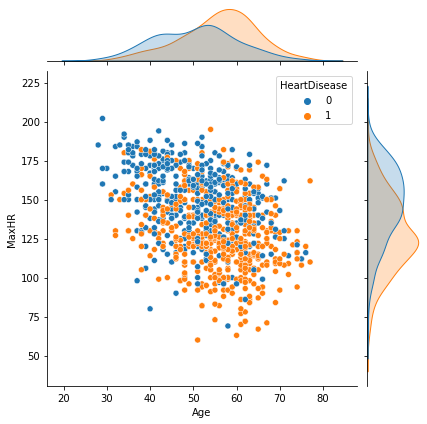

In [28]:
plt.figure(figsize=(10,8))
sns.jointplot(data=df,x='Age',y='MaxHR',hue='HeartDisease')


<Figure size 720x576 with 0 Axes>

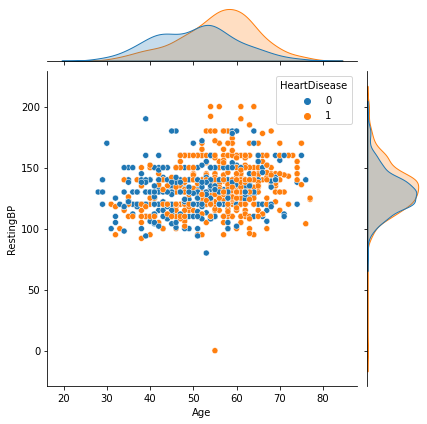

In [29]:
plt.figure(figsize=(10,8))
sns.jointplot(data=df,x='Age',y='RestingBP',hue='HeartDisease')


<Figure size 720x576 with 0 Axes>

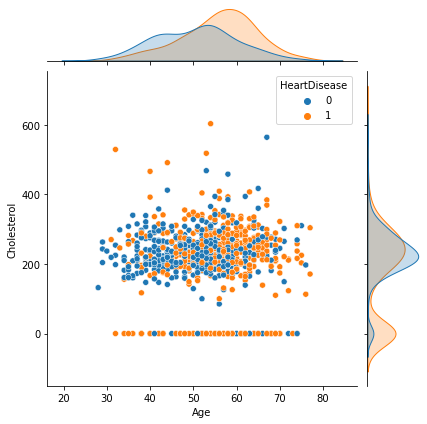

In [30]:
plt.figure(figsize=(10,8))
sns.jointplot(data=df,x='Age',y='Cholesterol',hue='HeartDisease')


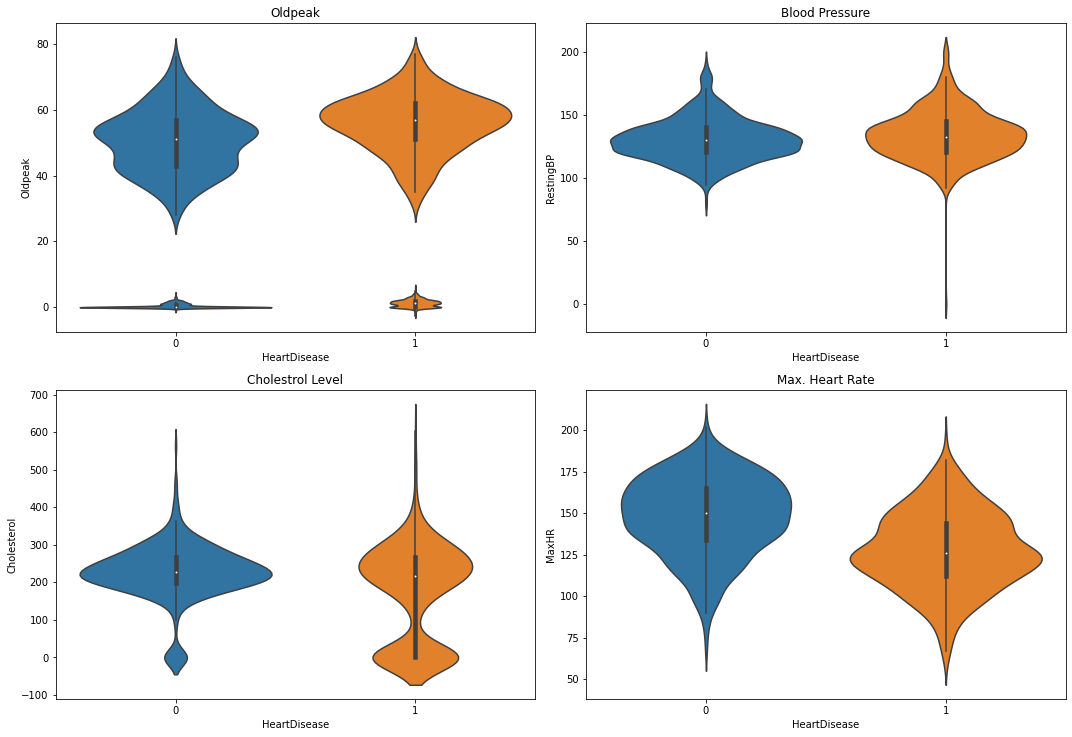

In [31]:
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.violinplot(x=df['HeartDisease'], y=df['Age'])
plt.title('Age')

plt.subplot(3,2,2)
sns.violinplot(x=df['HeartDisease'], y=df['RestingBP'])
plt.title('Blood Pressure')

plt.subplot(3,2,3)
sns.violinplot(x=df['HeartDisease'], y=df['Cholesterol'])
plt.title('Cholestrol Level')

plt.subplot(3,2,4)
sns.violinplot(x=df['HeartDisease'], y=df['MaxHR'])
plt.title('Max. Heart Rate')

plt.subplot(3,2,1)
sns.violinplot(x=df['HeartDisease'], y=df['Oldpeak'])
plt.title('Oldpeak')

plt.tight_layout()

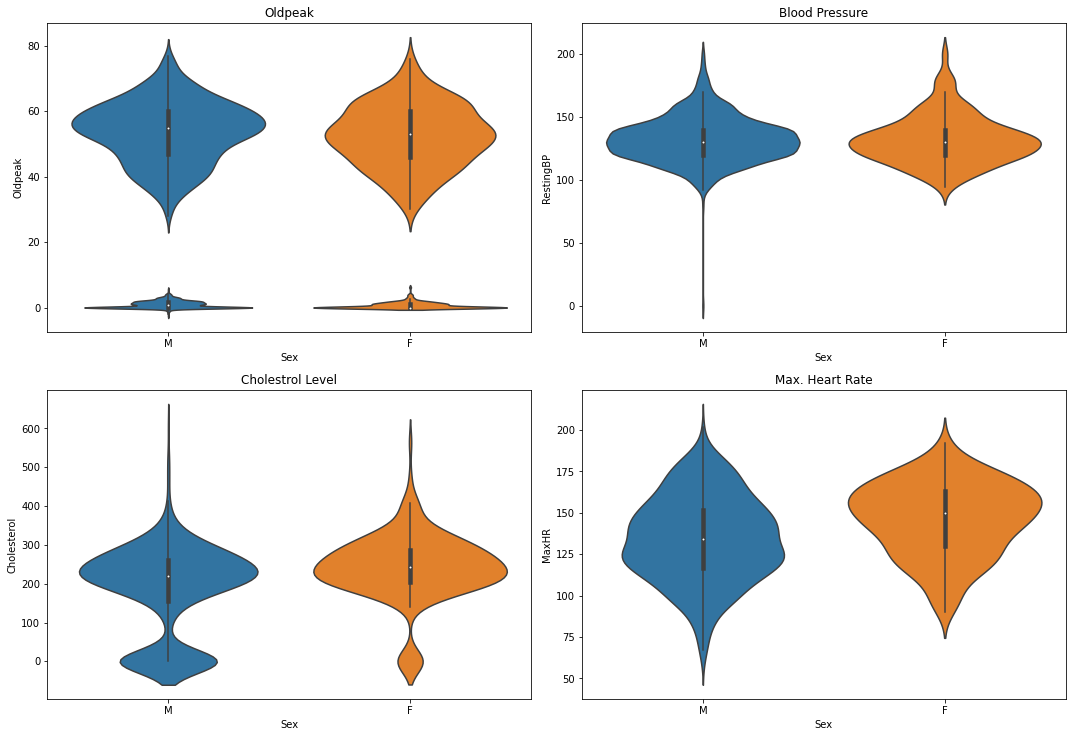

In [32]:
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.violinplot(x=df['Sex'], y=df['Age'])
plt.title('Age')

plt.subplot(3,2,2)
sns.violinplot(x=df['Sex'], y=df['RestingBP'])
plt.title('Blood Pressure')

plt.subplot(3,2,3)
sns.violinplot(x=df['Sex'], y=df['Cholesterol'])
plt.title('Cholestrol Level')

plt.subplot(3,2,4)
sns.violinplot(x=df['Sex'], y=df['MaxHR'])
plt.title('Max. Heart Rate')

plt.subplot(3,2,1)
sns.violinplot(x=df['Sex'], y=df['Oldpeak'])
plt.title('Oldpeak')

plt.tight_layout()

<AxesSubplot:title={'center':'Heatmap for DataFrame (without Encoding object type features)'}>

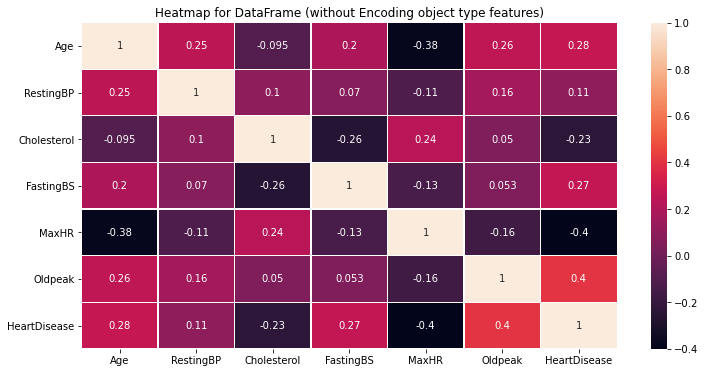

In [33]:
df_corr = df.corr()
plt.figure(figsize=(12,6))
plt.title("Heatmap for DataFrame (without Encoding object type features)")
sns.heatmap(df_corr,annot=True,linecolor='White',linewidth=0.2)

In [34]:
one_hot_encoded_sex = pd.get_dummies(df,columns=["Sex"],drop_first=True)
one_hot_encoded_sex.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_M
0,40,ATA,140,289,0,Normal,172,N,0.0,Up,0,1
1,49,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0
2,37,ATA,130,283,0,ST,98,N,0.0,Up,0,1
3,48,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0
4,54,NAP,150,195,0,Normal,122,N,0.0,Up,0,1


In [35]:
one_hot_encoded_cpt = pd.get_dummies(one_hot_encoded_sex,columns=["ChestPainType"],drop_first=True)
                                     
one_hot_encoded_cpt.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,Normal,172,N,0.0,Up,0,1,1,0,0
1,49,160,180,0,Normal,156,N,1.0,Flat,1,0,0,1,0
2,37,130,283,0,ST,98,N,0.0,Up,0,1,1,0,0
3,48,138,214,0,Normal,108,Y,1.5,Flat,1,0,0,0,0
4,54,150,195,0,Normal,122,N,0.0,Up,0,1,0,1,0


In [36]:
one_hot_encoded_recg = pd.get_dummies(one_hot_encoded_cpt,columns=["RestingECG"],drop_first=True)
                                     
one_hot_encoded_recg.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST
0,40,140,289,0,172,N,0.0,Up,0,1,1,0,0,1,0
1,49,160,180,0,156,N,1.0,Flat,1,0,0,1,0,1,0
2,37,130,283,0,98,N,0.0,Up,0,1,1,0,0,0,1
3,48,138,214,0,108,Y,1.5,Flat,1,0,0,0,0,1,0
4,54,150,195,0,122,N,0.0,Up,0,1,0,1,0,1,0


In [37]:
one_hot_encoded_exa = pd.get_dummies(one_hot_encoded_recg,columns=["ExerciseAngina"],drop_first=True)
                                     
one_hot_encoded_exa.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y
0,40,140,289,0,172,0.0,Up,0,1,1,0,0,1,0,0
1,49,160,180,0,156,1.0,Flat,1,0,0,1,0,1,0,0
2,37,130,283,0,98,0.0,Up,0,1,1,0,0,0,1,0
3,48,138,214,0,108,1.5,Flat,1,0,0,0,0,1,0,1
4,54,150,195,0,122,0.0,Up,0,1,0,1,0,1,0,0


In [38]:
final_df = pd.get_dummies(one_hot_encoded_exa,columns=["ST_Slope"],drop_first=True)
                                     
final_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


# Data Preprocessing

In [39]:
final_df.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [40]:
final_df.rename(columns={'Sex_M': 'Sex', 'ExerciseAngina_Y': 'ExerciseAngina'}, inplace=True)
final_df.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [41]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex                918 non-null    uint8  
 8   ChestPainType_ATA  918 non-null    uint8  
 9   ChestPainType_NAP  918 non-null    uint8  
 10  ChestPainType_TA   918 non-null    uint8  
 11  RestingECG_Normal  918 non-null    uint8  
 12  RestingECG_ST      918 non-null    uint8  
 13  ExerciseAngina     918 non-null    uint8  
 14  ST_Slope_Flat      918 non-null    uint8  
 15  ST_Slope_Up        918 non-null    uint8  
dtypes: float64(1), int64(6), u

<AxesSubplot:title={'center':'Heatmap for Final DataFrame (After Encoding object type features)'}>

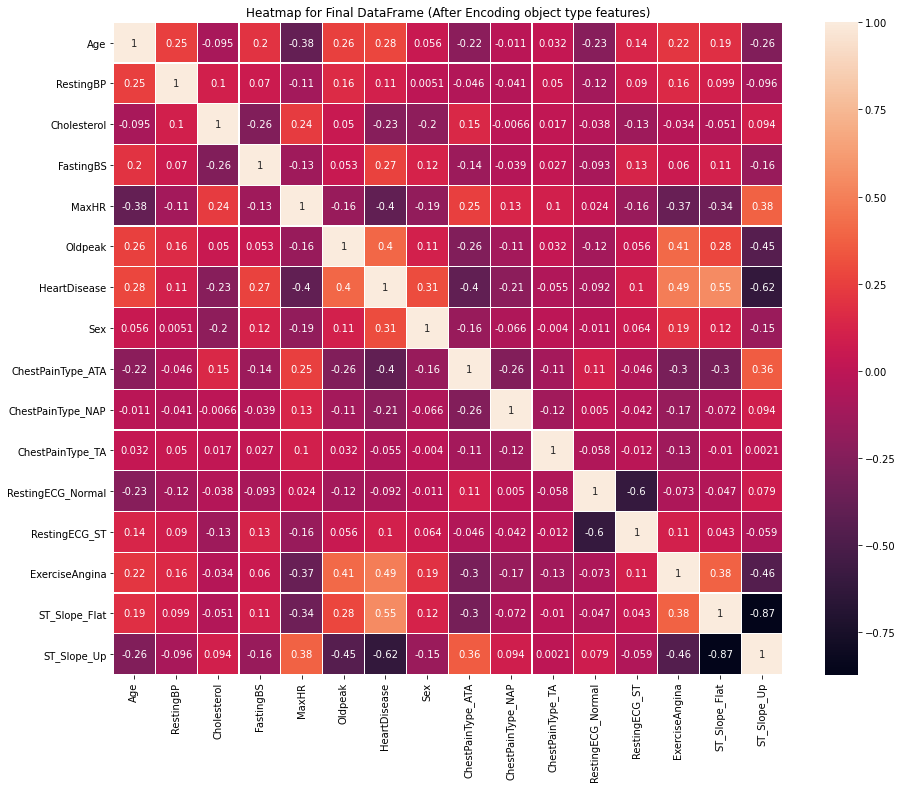

In [42]:
final_df_corr = final_df.corr()
plt.figure(figsize=(15,12))
plt.title("Heatmap for Final DataFrame (After Encoding object type features)")
sns.heatmap(final_df_corr,annot=True,linecolor='white',linewidths=0.2)

# Import ML Libraries

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,log_loss
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import CategoricalNB
import shap

# Train Test and Split Data

In [44]:
X = final_df.drop("HeartDisease",axis=1)
y = final_df["HeartDisease"]

In [45]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=21)


In [46]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((642, 15), (276, 15), (642,), (276,))

In [47]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
lr = LogisticRegression()
dtree = DecisionTreeClassifier()
rfc= RandomForestClassifier(n_estimators=200)
svm = SVC(probability=True)
knn = KNeighborsClassifier(n_neighbors=5)
nb = CategoricalNB(alpha=1.0)

In [49]:
algos = [lr,dtree,rfc,svm,knn,nb]
ml_algo = ['Logistic Regs', 'Decision Tree', 'Random Forest', 'SVM', 'KNeighbors', 'NB']

for i,j in zip(algos,ml_algo):
    i.fit(X_train,y_train)
    pred = i.predict(X_test)
    print(j,':\n')
    print("Accuracy Score:{:.2f}%".format(accuracy_score(y_test,pred)*100))
    print("Log Loss:{:.2f}".format(log_loss(y_test,pred)))
    print("="*40)
    

Logistic Regs :

Accuracy Score:88.77%
Log Loss:3.88
Decision Tree :

Accuracy Score:79.35%
Log Loss:7.13
Random Forest :

Accuracy Score:89.86%
Log Loss:3.50
SVM :

Accuracy Score:86.96%
Log Loss:4.51
KNeighbors :

Accuracy Score:88.77%
Log Loss:3.88
NB :

Accuracy Score:86.96%
Log Loss:4.51


# Logistic Regession

In [50]:
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
print("Classification Report of Logistic Regression:\n")
print(classification_report(y_test,lr_pred))

Classification Report of Logistic Regression:

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       108
           1       0.90      0.92      0.91       168

    accuracy                           0.89       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.89      0.89      0.89       276



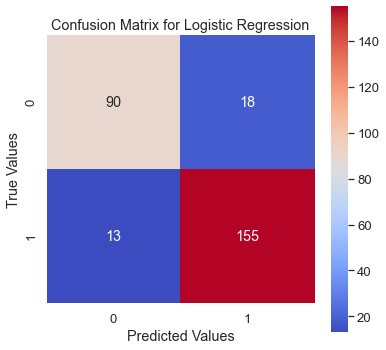

In [51]:
lr_cm = confusion_matrix(y_test, lr_pred)
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.2)
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='coolwarm', square=True, xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()


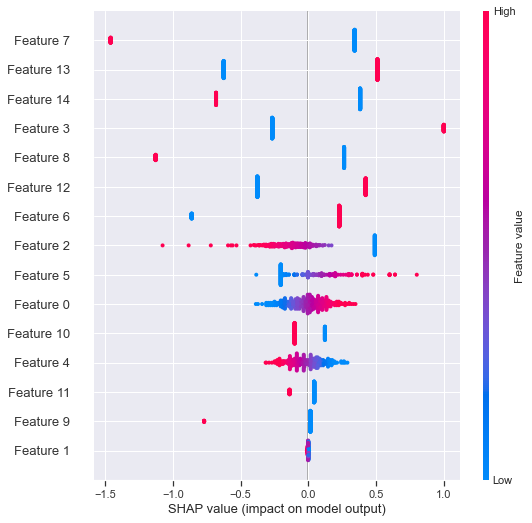

In [52]:
plt.figure(figsize=(12,8))
masker = shap.maskers.Independent(data = X_train)
explainer_of_dtc = shap.LinearExplainer(lr,masker=masker)
shap_value = explainer_of_dtc.shap_values(X_test)
shap.summary_plot(shap_value,X_test)

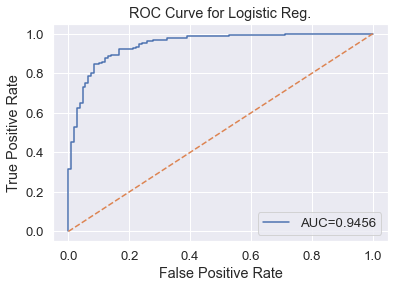

In [53]:
lr_pred_prob = lr.predict_proba(X_test)[:,1]  # Fixed indexing
lr_actual_predict = pd.concat([pd.DataFrame(np.array(y_test), columns=["y actual"]), pd.DataFrame(lr_pred_prob, columns=['y pred'])], axis=1)  # Added missing brackets and corrected DataFrame concatenation
lr_actual_predict.index = y_test.index  # Corrected variable name

fpr, tpr, tr = roc_curve(lr_actual_predict['y actual'], lr_actual_predict['y pred'])  # Fixed variable names
auc = roc_auc_score(lr_actual_predict['y actual'], lr_actual_predict['y pred'])  # Fixed variable names

plt.plot(fpr, tpr, label='AUC=%.4f' % auc)
plt.plot([0, 1], [0, 1], linestyle='--')  # Added diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Reg.')
plt.legend()
plt.show()


In [54]:
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
print("Classification Report of Random Forest:\n")
print(classification_report(y_test,rfc_pred))

Classification Report of Random Forest:

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       108
           1       0.91      0.93      0.92       168

    accuracy                           0.90       276
   macro avg       0.90      0.89      0.89       276
weighted avg       0.90      0.90      0.90       276



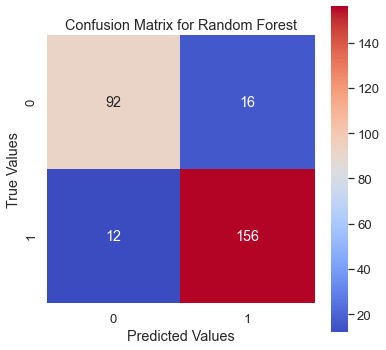

In [55]:
rfc_cm = confusion_matrix(y_test, rfc_pred)
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.2)
sns.heatmap(rfc_cm, annot=True, fmt='d', cmap='coolwarm', square=True, xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title("Confusion Matrix for Random Forest")
plt.show()

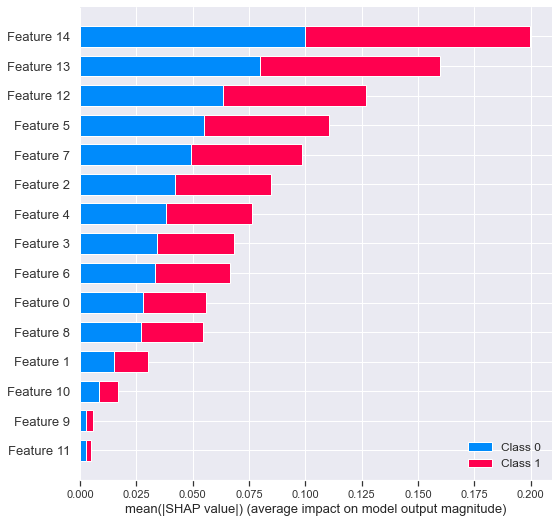

In [56]:
explainer_of_rfc = shap.TreeExplainer(rfc)
shap_value = explainer_of_rfc.shap_values(X_test)
shap.summary_plot(shap_value,X_test)

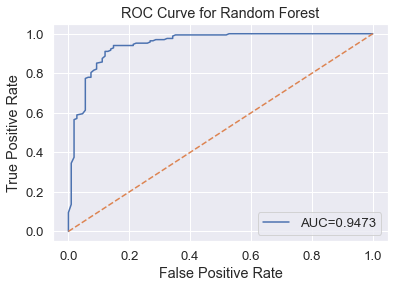

In [57]:
rfc_pred_prob = rfc.predict_proba(X_test)[:,1]  # Fixed indexing
rfc_actual_predict = pd.concat([pd.DataFrame(np.array(y_test), columns=["y actual"]), pd.DataFrame(rfc_pred_prob, columns=['y pred'])], axis=1)  # Added missing brackets and corrected DataFrame concatenation
rfc_actual_predict.index = y_test.index  # Corrected variable name

fpr, tpr, tr = roc_curve(rfc_actual_predict['y actual'], rfc_actual_predict['y pred'])  # Fixed variable names
auc = roc_auc_score(rfc_actual_predict['y actual'], rfc_actual_predict['y pred'])  # Fixed variable names

plt.plot(fpr, tpr, label='AUC=%.4f' % auc)
plt.plot([0, 1], [0, 1], linestyle='--')  # Added diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend()
plt.show()

# Support Vector Machine (SVM)

In [58]:
svm.fit(X_train,y_train)
svm_pred = svm.predict(X_test)
print("Classification Report of SVM:\n")
print(classification_report(y_test,svm_pred))

Classification Report of SVM:

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       108
           1       0.88      0.90      0.89       168

    accuracy                           0.87       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.87      0.87      0.87       276



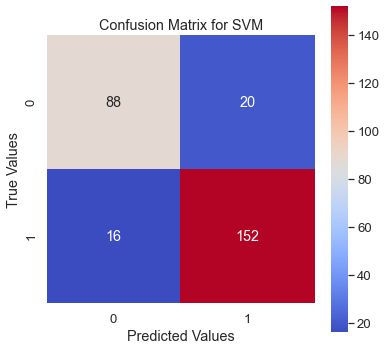

In [59]:
svm_cm = confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.2)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='coolwarm', square=True, xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title("Confusion Matrix for SVM")
plt.show()

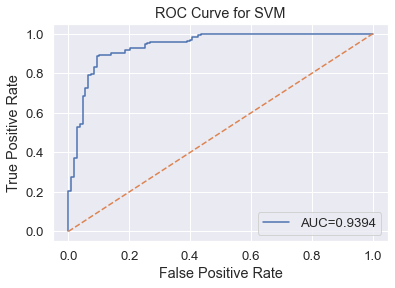

In [60]:
svm_pred_prob = svm.predict_proba(X_test)[:,1]  # Fixed indexing
svm_actual_predict = pd.concat([pd.DataFrame(np.array(y_test), columns=["y actual"]), pd.DataFrame(svm_pred_prob, columns=['y pred'])], axis=1)  # Added missing brackets and corrected DataFrame concatenation
svm_actual_predict.index = y_test.index  # Corrected variable name

fpr, tpr, tr = roc_curve(svm_actual_predict['y actual'], svm_actual_predict['y pred'])  # Fixed variable names
auc = roc_auc_score(svm_actual_predict['y actual'], svm_actual_predict['y pred'])  # Fixed variable names

plt.plot(fpr, tpr, label='AUC=%.4f' % auc)
plt.plot([0, 1], [0, 1], linestyle='--')  # Added diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend()
plt.show()

# Comparison of Different Models Confusion Matrix

In [61]:
cm_models = [lr_cm,rfc_cm,svm_cm]
cm_model = ['Logistic Regs', 'Random Forest', 'SVM']
for i,j in zip(cm_models,cm_model):
    print(j,'Confusion Matrix:\n')
    print(i)
    print('='*30)

Logistic Regs Confusion Matrix:

[[ 90  18]
 [ 13 155]]
Random Forest Confusion Matrix:

[[ 92  16]
 [ 12 156]]
SVM Confusion Matrix:

[[ 88  20]
 [ 16 152]]


# Saving Model 

In [62]:
import pickle

In [63]:
save_rfc_model = pickle.dumps(rfc)
rfc_from_pickle = pickle.loads(save_rfc_model)
rfc_from_pickle.predict(X_test)

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [64]:
final_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [65]:
rfc_from_pickle.predict([[30,158,220,0,160,1.3,1,0,0,1,1,0,0,0,0]])

array([1], dtype=int64)

In [66]:
with open("heart_disease_model.pkl", "wb") as file:
    pickle.dump(rfc_from_pickle, file)